# Teensy Log Plotter
Updated for extended control/motor debug logging.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

log_path = 'log10.csv'
df = pd.read_csv(log_path)
df.head()

,t_us,ax_g,ay_g,az_g,gx_dps,gy_dps,gz_dps,roll_deg,pitch_deg,throttle_us,...,att_sp_yaw,rate_sp_roll,rate_sp_pitch,rate_sp_yaw,rate_meas_roll,rate_meas_pitch,rate_meas_yaw,rate_out_roll,rate_out_pitch,rate_out_yaw
0,6108523,-0.002,0.001,1.002,-0.01,-0.01,-0.02,0.12,0.07,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6112523,-0.002,-0.000,1.000,-0.01,-0.00,-0.02,0.08,0.09,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6116523,-0.004,0.001,1.000,-0.02,0.00,-0.02,0.08,0.14,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6120523,-0.005,0.001,0.998,-0.04,-0.01,-0.02,0.07,0.19,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6124523,-0.004,-0.000,0.997,-0.03,-0.02,-0.02,0.04,0.21,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


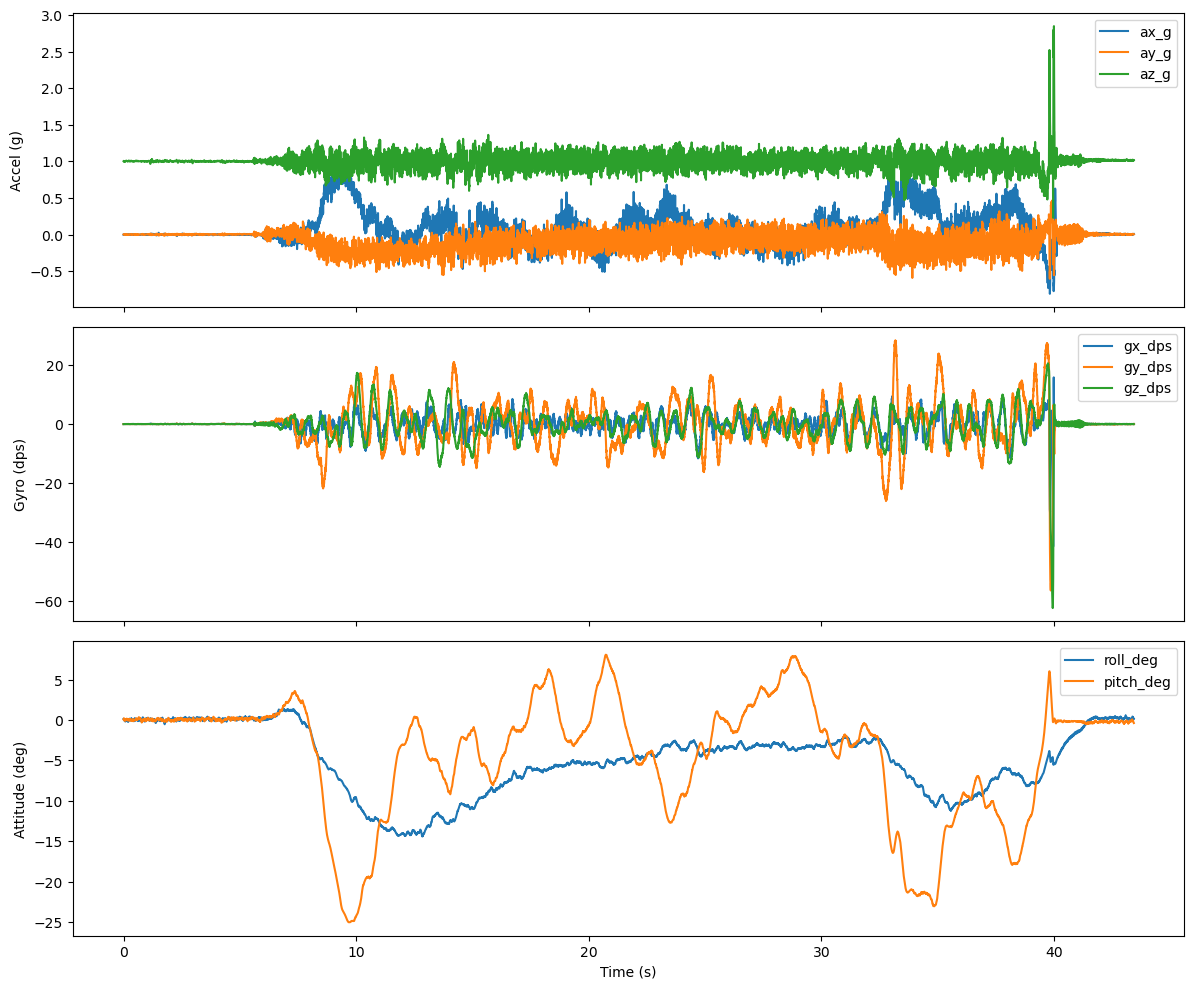

In [140]:
t = (df['t_us'] - df['t_us'].iloc[0]) / 1e6

fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

ax[0].plot(t, df['ax_g'], label='ax_g')
ax[0].plot(t, df['ay_g'], label='ay_g')
ax[0].plot(t, df['az_g'], label='az_g')
ax[0].set_ylabel('Accel (g)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['gx_dps'], label='gx_dps')
ax[1].plot(t, df['gy_dps'], label='gy_dps')
ax[1].plot(t, df['gz_dps'], label='gz_dps')
ax[1].set_ylabel('Gyro (dps)')
ax[1].legend(loc='upper right')

ax[2].plot(t, df['roll_deg'], label='roll_deg')
ax[2].plot(t, df['pitch_deg'], label='pitch_deg')
ax[2].set_ylabel('Attitude (deg)')
ax[2].set_xlabel('Time (s)')
ax[2].legend(loc='upper right')

plt.tight_layout()

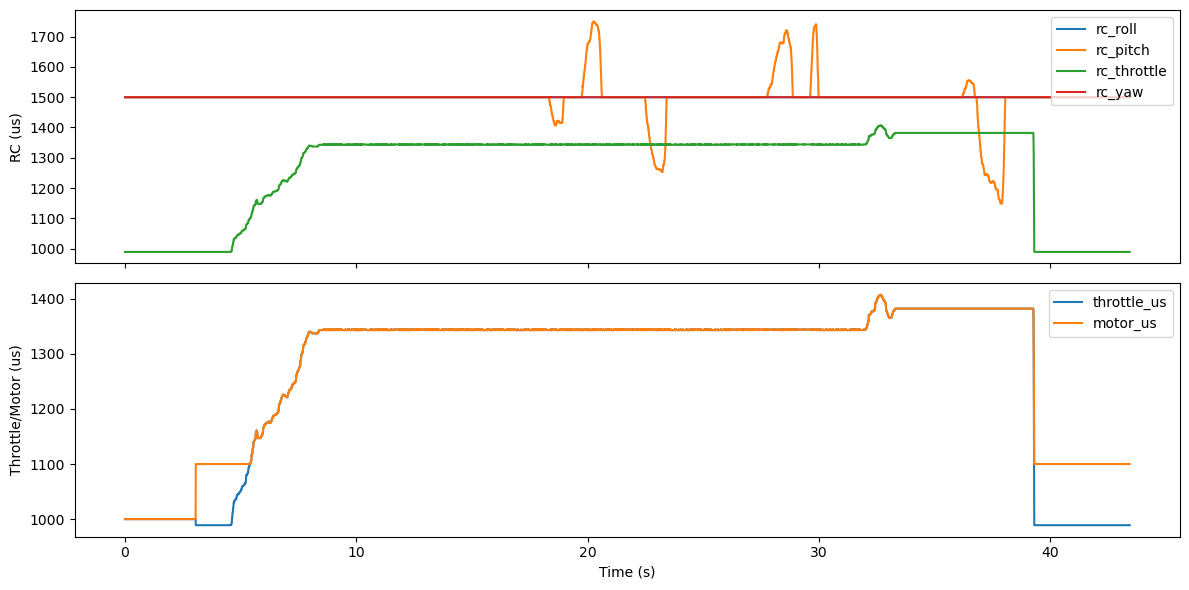

In [141]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax[0].plot(t, df['rc_roll'], label='rc_roll')
ax[0].plot(t, df['rc_pitch'], label='rc_pitch')
ax[0].plot(t, df['rc_throttle'], label='rc_throttle')
ax[0].plot(t, df['rc_yaw'], label='rc_yaw')
ax[0].set_ylabel('RC (us)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['throttle_us'], label='throttle_us')
ax[1].plot(t, df['motor_us'], label='motor_us')
ax[1].set_ylabel('Throttle/Motor (us)')
ax[1].set_xlabel('Time (s)')
ax[1].legend(loc='upper right')

plt.tight_layout()

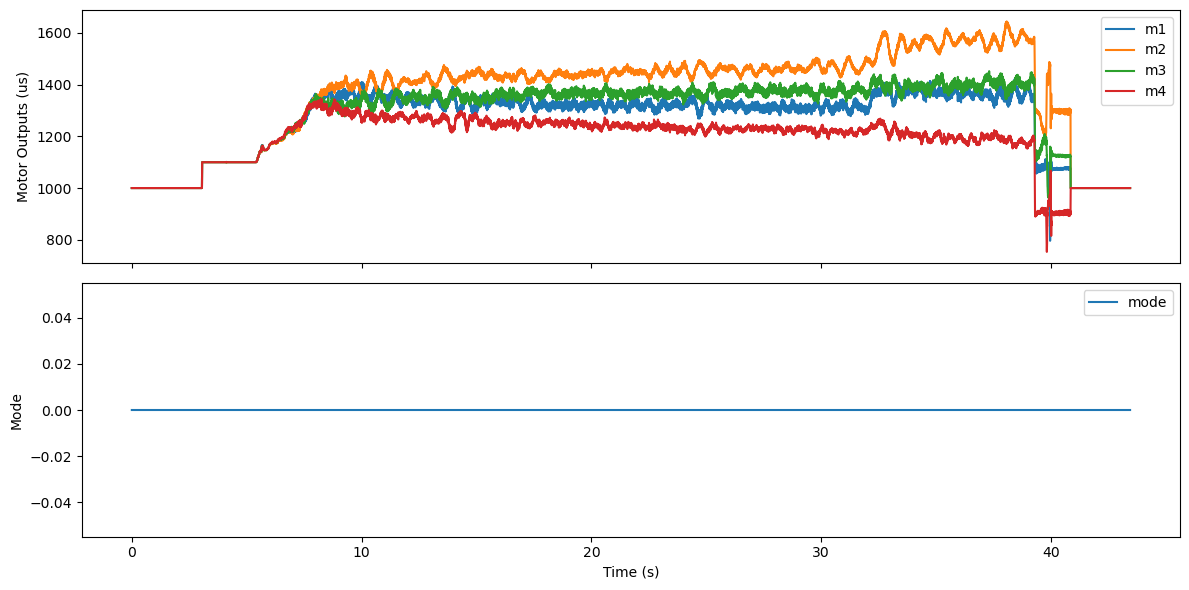

In [142]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax[0].plot(t, df['m1'], label='m1')
ax[0].plot(t, df['m2'], label='m2')
ax[0].plot(t, df['m3'], label='m3')
ax[0].plot(t, df['m4'], label='m4')
ax[0].set_ylabel('Motor Outputs (us)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['mode'], label='mode')
ax[1].set_ylabel('Mode')
ax[1].set_xlabel('Time (s)')
ax[1].legend(loc='upper right')

plt.tight_layout()

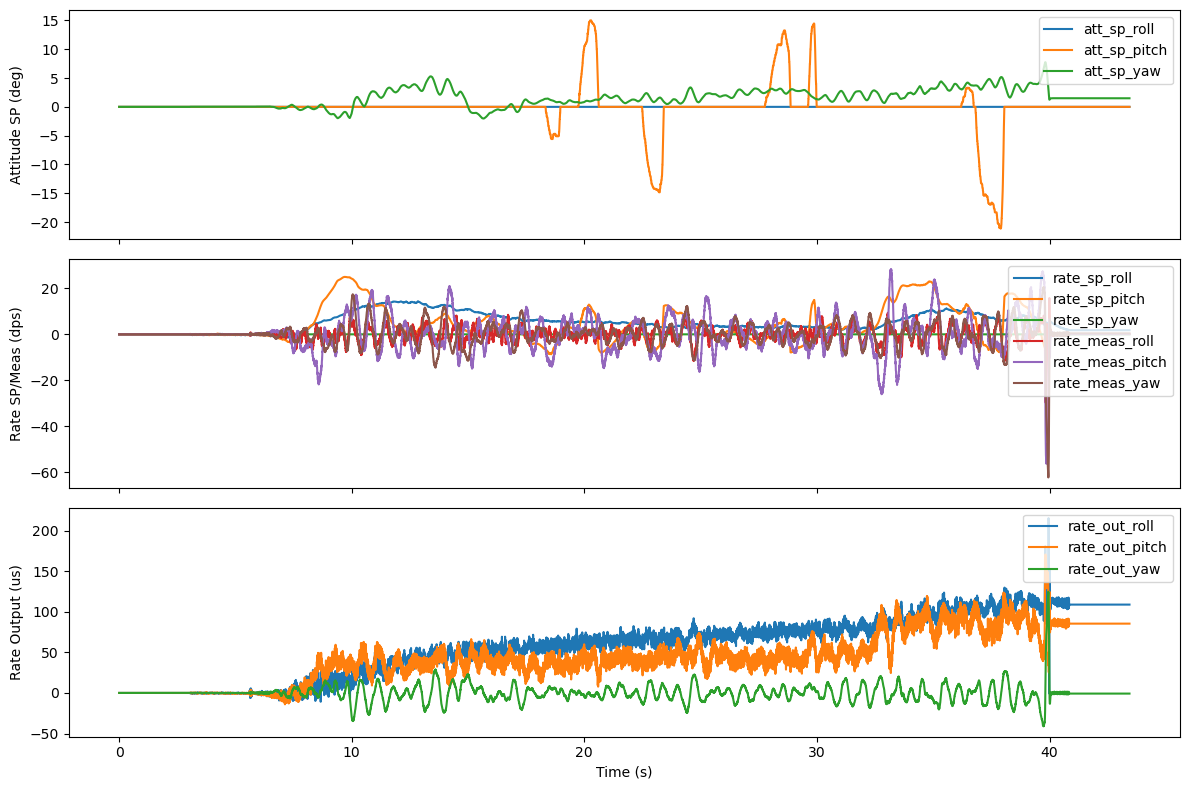

In [143]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax[0].plot(t, df['att_sp_roll'], label='att_sp_roll')
ax[0].plot(t, df['att_sp_pitch'], label='att_sp_pitch')
ax[0].plot(t, df['att_sp_yaw'], label='att_sp_yaw')
ax[0].set_ylabel('Attitude SP (deg)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['rate_sp_roll'], label='rate_sp_roll')
ax[1].plot(t, df['rate_sp_pitch'], label='rate_sp_pitch')
ax[1].plot(t, df['rate_sp_yaw'], label='rate_sp_yaw')
ax[1].plot(t, df['rate_meas_roll'], label='rate_meas_roll')
ax[1].plot(t, df['rate_meas_pitch'], label='rate_meas_pitch')
ax[1].plot(t, df['rate_meas_yaw'], label='rate_meas_yaw')
ax[1].set_ylabel('Rate SP/Meas (dps)')
ax[1].legend(loc='upper right')

ax[2].plot(t, df['rate_out_roll'], label='rate_out_roll')
ax[2].plot(t, df['rate_out_pitch'], label='rate_out_pitch')
ax[2].plot(t, df['rate_out_yaw'], label='rate_out_yaw')
ax[2].set_ylabel('Rate Output (us)')
ax[2].set_xlabel('Time (s)')
ax[2].legend(loc='upper right')

plt.tight_layout()

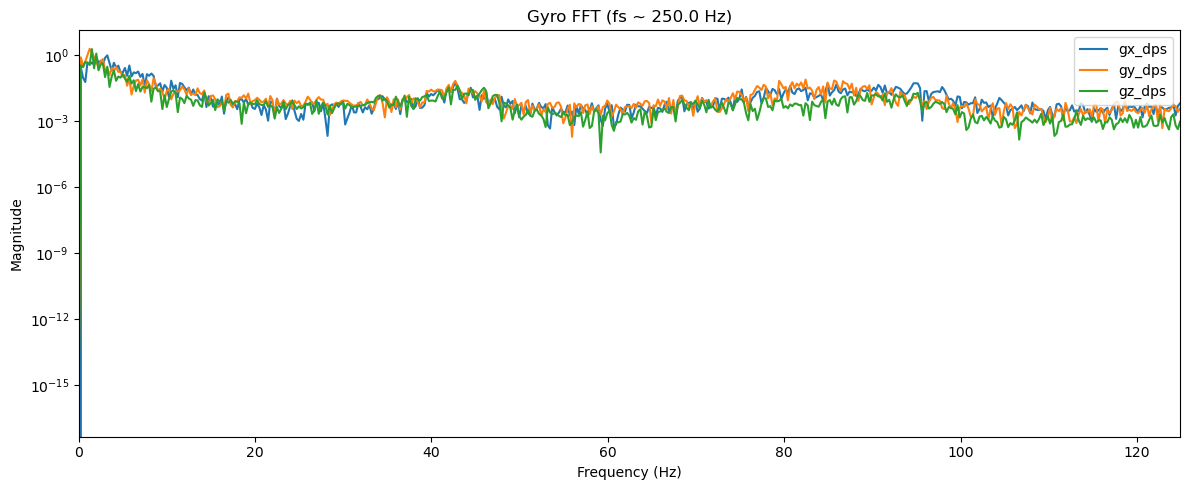

In [117]:
import numpy as np

# FFT of gyro axes (gx_dps, gy_dps, gz_dps)
# Choose a window (seconds) for steady vibration
t = (df['t_us'] - df['t_us'].iloc[0]) / 1e6
t0 = t.iloc[2000]
t1 = t.iloc[3000]

# Example: analyze full log; change t0/t1 for a subset
mask = (t >= t0) & (t <= t1)
t_sel = t[mask].to_numpy()

def compute_fft(sig, t_vec):
    # Remove DC
    sig = sig - np.mean(sig)
    # Assume uniform sampling; estimate fs from median dt
    dt = np.median(np.diff(t_vec))
    fs = 1.0 / dt if dt > 0 else 1.0
    n = len(sig)
    freqs = np.fft.rfftfreq(n, d=dt)
    mag = np.abs(np.fft.rfft(sig)) / n
    return freqs, mag, fs

gx = df.loc[mask, 'gx_dps'].to_numpy()
gy = df.loc[mask, 'gy_dps'].to_numpy()
gz = df.loc[mask, 'gz_dps'].to_numpy()

fx, mx, fs = compute_fft(gx, t_sel)
fy, my, _ = compute_fft(gy, t_sel)
fz, mz, _ = compute_fft(gz, t_sel)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.semilogy(fx, mx, label='gx_dps')
ax.semilogy(fy, my, label='gy_dps')
ax.semilogy(fz, mz, label='gz_dps')
ax.set_xlim(0, min(500, fx[-1]))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title(f'Gyro FFT (fs ~ {fs:.1f} Hz)')
ax.legend(loc='upper right')
plt.tight_layout()